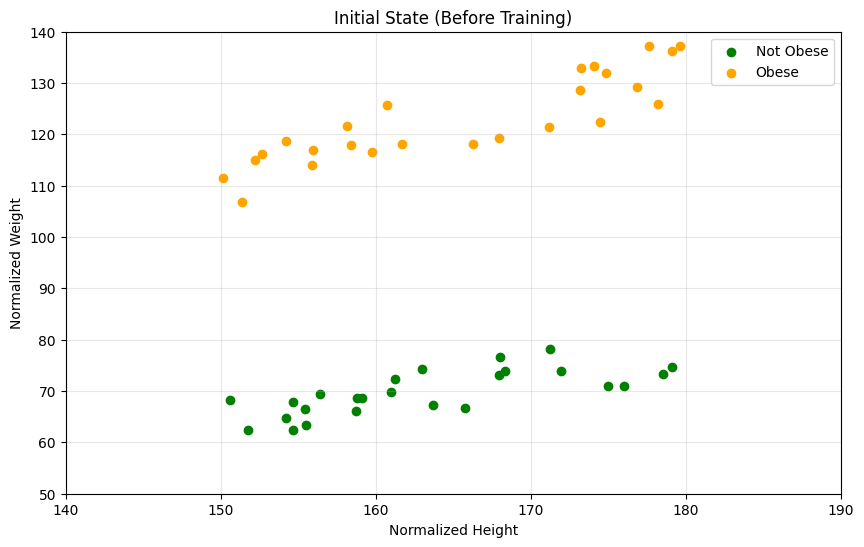

Converged after 5 iterations with 7 weight updates


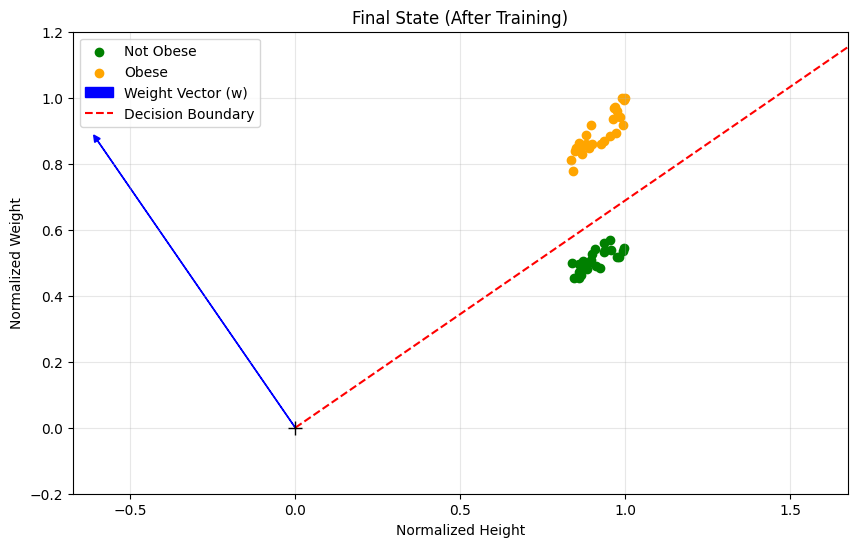


Final normalized weights: [-0.59954474  0.87034993]

Final accuracy: 100.00%


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate data
n_samples = 25
height_non_obese = 150 + np.random.rand(n_samples) * 30
weight_non_obese = height_non_obese * 0.4 + np.random.rand(n_samples) * 10
category_non_obese = np.ones(n_samples) * -1  # -1 for non-obese

height_obese = 150 + np.random.rand(n_samples) * 30
weight_obese = height_obese * 0.7 + np.random.rand(n_samples) * 15
category_obese = np.ones(n_samples)  # 1 for obese

# Combine the data
X = np.column_stack([
    np.concatenate([height_non_obese, height_obese]),
    np.concatenate([weight_non_obese, weight_obese])
])
y = np.concatenate([category_non_obese, category_obese])

# Step 1: Normalize the data
max_values = np.max(X, axis=0)
X_normalized = X / max_values

# Initialize weight vector
w = np.zeros(2)
max_iterations = 1000
updates = 0

# Function to plot decision boundary
def plot_decision_boundary(X, y, w, title):
    plt.figure(figsize=(10, 6))

    # Plot the data points
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c='green', label='Not Obese')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='orange', label='Obese')

    if not np.all(w == 0):
        # Plot the weight vector w
        plt.arrow(0, 0, w[0], w[1],
                 head_width=0.02, head_length=0.02,
                 fc='blue', ec='blue',
                 label='Weight Vector (w)')

        # Calculate the midpoint between the two classes
        midpoint = np.mean(X, axis=0)

        # Calculate perpendicular slope
        slope = -w[0]/w[1]

        x_points = np.linspace(0, 2, 10)
        y_points = slope * x_points

        plt.plot(x_points,y_points, 'r--', label='Decision Boundary(Hyper Plane)')

    plt.xlabel('Normalized Height')
    plt.ylabel('Normalized Weight')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Set proper axis limits to show data points clearly
    if title.startswith('Initial'):
        plt.xlim(140, 190)  # Adjust based on your actual height range
        plt.ylim(50, 140)   # Adjust based on your actual weight range
    else:
        # For other plots, keep the normalized scale
        plt.axis('equal')
        plt.xlim(-0.2, 1.2)
        plt.ylim(-0.2, 1.2)

    # Add the origin
    plt.plot(0, 0, 'k+', markersize=10)

    plt.show()

# Initial plot
plot_decision_boundary(X, y, w, 'Initial State (Before Training)')

# Perceptron Training
for iteration in range(max_iterations):
    misclassified = 0

    for i in range(len(X_normalized)):
        # Step 2: Calculate y*w^T*x
        activation = y[i] * np.dot(w, X_normalized[i])

        # Step 3: Update weights if misclassified
        if activation <= 0:
            w +=  y[i] * X_normalized[i]
            misclassified += 1
            updates += 1

    # Step 4: Check if most points are correctly classified
    if misclassified == 0:
        print(f"Converged after {iteration + 1} iterations with {updates} weight updates")
        break

    if iteration == max_iterations - 1:
        print(f"Maximum iterations ({max_iterations}) reached")

# Final plot
plot_decision_boundary(X_normalized, y, w, 'Final State (After Training)')

# Print final weights
print("\nFinal normalized weights:", w)

# Calculate accuracy
predictions = np.sign(np.dot(X_normalized, w))
accuracy = np.mean(predictions == y) * 100
print(f"\nFinal accuracy: {accuracy:.2f}%")